# Face Recognition con ArcFace

[Domingo Mery](http://domingomery.ing.puc.cl)

Departamento de Ciencia de la Computación

Universidad Católica de Chile

Deng, J., Guo, J., Xue, N., & Zafeiriou, S. (2019). [Arcface: Additive angular margin loss for deep face recognition](https://openaccess.thecvf.com/content_CVPR_2019/papers/Deng_ArcFace_Additive_Angular_Margin_Loss_for_Deep_Face_Recognition_CVPR_2019_paper.pdf). In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 4690-4699).



## Librería ArcFace

In [1]:
!pip install arcface

## Imágenes de prueba

Las caras A y B son de la misma persona, la cara C es de otra persona

In [ ]:
!wget https://www.dropbox.com/s/2747g2z7c4rb8ii/facesABC.zip
!unzip facesABC.zip

--2024-10-17 22:52:21--  https://www.dropbox.com/s/2747g2z7c4rb8ii/facesABC.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/oe8l8prrx6r0ydxjgn5ac/facesABC.zip?rlkey=zg6d70i2377bchkldtewddfl3 [following]
--2024-10-17 22:52:22--  https://www.dropbox.com/scl/fi/oe8l8prrx6r0ydxjgn5ac/facesABC.zip?rlkey=zg6d70i2377bchkldtewddfl3
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc04b49a17453f69847112aae51a.dl.dropboxusercontent.com/cd/0/inline/Ccpt8UJVOKjTd0FEVOYap-ldNekQZo8NpmWxfdxB3GE275sQySINeHol84oguX6vaFy-9DEFLKneV0EecOv-30mOrNh2SyFXbzYf_AEb-dDF0VtUFoQxhgXHQQOV1G49yBc/file# [following]
--2024-10-17 22:52:23--  https://uc04b49a17453f69847112aae51a.dl.dropboxusercontent.com/cd/0/inline/Ccpt8UJVOKjTd0FEVOYap-ldNekQZo8NpmWxfdxB3GE275sQyS

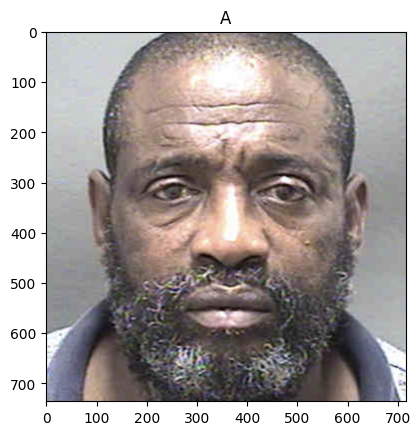

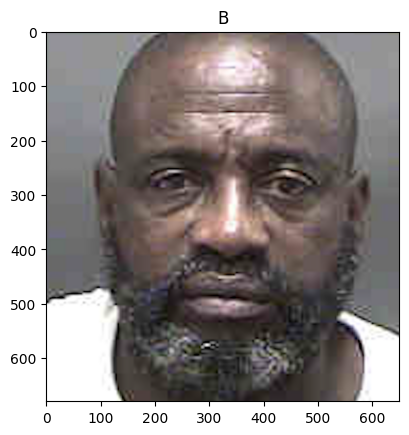

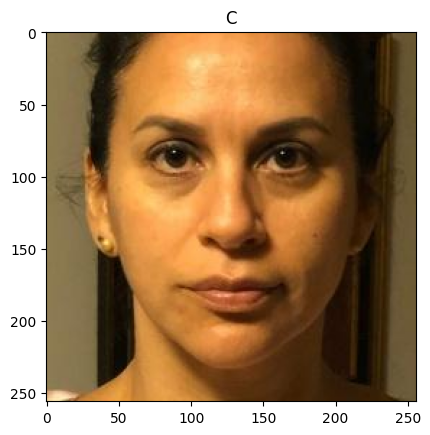

In [4]:
import cv2
import matplotlib.pyplot as plt


A = cv2.imread('faceA.png')
B = cv2.imread('faceB.png')
C = cv2.imread('faceC.jpg')

plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title('A')
plt.show()
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title('B')
plt.show()
plt.imshow(cv2.cvtColor(C, cv2.COLOR_BGR2RGB))
plt.title('C')
plt.show()


## Cómputo de Embeddings

In [5]:
from arcface import ArcFace

In [7]:
from astropy.utils.data import download_file
arcface = ArcFace.ArcFace(model_path=download_file("https://www.digidow.eu/f/datasets/arcface-tensorflowlite/model.tflite", cache=True)) # Removed "Enlaces a un sitio externo." from the URL
xA = arcface.calc_emb(A)
xB = arcface.calc_emb(B)
xC = arcface.calc_emb(C)
print(xC)

[-0.00537565 -0.00498611  0.0595162  -0.04707683  0.08335938 -0.0457794
  0.05302458 -0.02313058  0.0206208   0.06516625 -0.01920246  0.01731695
  0.08169067 -0.0544541   0.07502011  0.0117621  -0.10731681 -0.05126936
  0.02211147 -0.04557757 -0.06071859  0.0304916  -0.04091013  0.06243486
 -0.01952972 -0.05175684 -0.0058617  -0.05751228 -0.02019864  0.00016616
  0.03116308  0.0586773   0.06564637 -0.03226845 -0.028438   -0.00570203
 -0.07011954  0.03306244 -0.04647858 -0.03111952  0.01783085  0.0022029
 -0.02220191 -0.04466723  0.00901788  0.01176238  0.0418952   0.07636502
 -0.0564733   0.04341116 -0.00663443 -0.03843028  0.03562068 -0.05956596
 -0.04748874  0.0257904  -0.05850872  0.11124615 -0.04664895  0.00473163
  0.00755268  0.02238709 -0.01020752 -0.07535993 -0.01971486 -0.0586836
 -0.0273712   0.06936299  0.00511558  0.01903095  0.06966526  0.02625357
  0.06087988 -0.03488236  0.04063701  0.00671408 -0.05924526 -0.03253126
  0.00280619 -0.02182552  0.0116451   0.08098287 -0.00

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## Cómputo de Score usando producto punto

In [ ]:
import numpy as np

In [ ]:
dAB = np.dot(xA,xB)
print('score(A,B) = ',dAB)

dAC = np.dot(xA,xC)
print('score(A,C) = ',dAC)

dBC = np.dot(xB,xC)
print('score(B,C) = ',dBC)

score(A,B) =  0.85394406
score(A,C) =  0.13831377
score(B,C) =  0.19748935


## Matching

Si un score es mayore a un umbral (por ejemplo 0.45) se dice que las caras pertenecen a la misma persona

In [ ]:
th = 0.45

if dAB>th:
  print('match(A,B): same person')
else:
  print('match(A,B): different persons')


if dAC>th:
  print('match(A,C): same person')
else:
  print('match(A,C): different persons')


if dBC>th:
  print('match(B,C): same person')
else:
  print('match(B,C): different persons')



match(A,B): same person
match(A,C): different persons
match(B,C): different persons
